In [6]:
import polars as pl
import matplotlib.pyplot as plt
%matplotlib inline
go_path = "/home/shannc/Bio_SDD/MUIC_senior_project/workflow/data/reference/go.obo"
sample = "/home/shannc/Bio_SDD/MUIC_senior_project/workflow/results/C_indra/1-First_pass/C_indra_all_wcoverage.tsv"
info_path = "/home/shannc/Bio_SDD/MUIC_senior_project/workflow/results/C_indra/Analysis/all_go_info.tsv"
%run /home/shannc/Bio_SDD/MUIC_senior_project/workflow/bin/go_subset.py

S = SubsetGO(go_path, sample, info_path)

## Map GO terms by keywords

In [8]:
info = pl.read_csv(info_path, separator="\t")
info

GO_IDs,term,definition,ontology
str,str,str,str
"""GO:0006508""","""proteolysis""","""The hydrolysis of proteins int…","""BP"""
"""GO:0004252""","""serine-type endopeptidase acti…","""Catalysis of the hydrolysis of…","""MF"""
"""GO:0005576""","""extracellular region""","""The space external to the oute…","""CC"""
"""GO:1903292""","""protein localization to Golgi …","""NA""","""BP"""
"""GO:0005802""","""trans-Golgi network""","""The network of interconnected …","""CC"""
…,…,…,…
"""GO:1904171""","""negative regulation of bleb as…","""NA""","""BP"""
"""GO:1905834""","""response to pyrimidine ribonuc…","""NA""","""BP"""
"""GO:1905835""","""cellular response to pyrimidin…","""NA""","""BP"""


In [23]:
import json
with open("/home/shannc/Bio_SDD/MUIC_senior_project/workflow/config/go_groups.json", "r") as r:
    custom = json.load(r)

id2group = {}
for group, members in custom.items():
    for member in members:
        id2group[member] = group

# info.filter((pl.col("term").str.contains_any(ex, ascii_case_insensitive = True)))



{'toxin': ['toxin', 'venom'], 'porin': ['porin', 'transporter']}

In [ ]:
S.metadata

GO_IDs,in_sample,n_children,level,term,definition,ontology
str,bool,i16,i16,str,str,str
"""GO:0006508""",true,15,5,"""proteolysis""","""The hydrolysis of proteins int…","""BP"""
"""GO:0004252""",true,0,5,"""serine-type endopeptidase acti…","""Catalysis of the hydrolysis of…","""MF"""
"""GO:0005576""",true,1,2,"""extracellular region""","""The space external to the oute…","""CC"""
"""GO:1903292""",true,0,7,"""protein localization to Golgi …","""NA""","""BP"""
"""GO:0005802""",true,0,4,"""trans-Golgi network""","""The network of interconnected …","""CC"""
…,…,…,…,…,…,…
"""GO:1904171""",true,0,8,"""negative regulation of bleb as…","""NA""","""BP"""
"""GO:1905834""",true,0,5,"""response to pyrimidine ribonuc…","""NA""","""BP"""
"""GO:1905835""",true,0,6,"""cellular response to pyrimidin…","""NA""","""BP"""


In [ ]:
# Number of categories (roots) we want is based on the maximum number of colors available for visualization
# 20 (using ggprism palette)
n_categories = 20
n_categories = n_categories - 2 # For uncategorized proteins, and for proteins that have annotation data above the root
children_per_cat = S.metadata.shape[0]/n_categories
# But GO terms above the chosen root will be ignored

# Need to do this for each ontology


In [ ]:
bp = S.getRepresentatives("BP", min_depth=2)
print(len(bp["unassigned"]))

shape: (18, 7)
┌────────────┬───────────┬────────────┬───────┬────────────────────┬────────────────────┬──────────┐
│ GO_IDs     ┆ in_sample ┆ n_children ┆ level ┆ term               ┆ definition         ┆ ontology │
│ ---        ┆ ---       ┆ ---        ┆ ---   ┆ ---                ┆ ---                ┆ ---      │
│ str        ┆ bool      ┆ i16        ┆ i16   ┆ str                ┆ str                ┆ str      │
╞════════════╪═══════════╪════════════╪═══════╪════════════════════╪════════════════════╪══════════╡
│ GO:0071840 ┆ true      ┆ 390        ┆ 2     ┆ cellular component ┆ A process that     ┆ BP       │
│            ┆           ┆            ┆       ┆ organizatio…       ┆ results in the …   ┆          │
│ GO:0044238 ┆ true      ┆ 346        ┆ 2     ┆ primary metabolic  ┆ The chemical       ┆ BP       │
│            ┆           ┆            ┆       ┆ process            ┆ reactions and pat… ┆          │
│ GO:0044237 ┆ true      ┆ 327        ┆ 2     ┆ cellular metabolic ┆ The che

In [ ]:
mf = S.getCandidates("MF")

shape: (18, 7)
┌────────────┬───────────┬────────────┬───────┬────────────────────┬────────────────────┬──────────┐
│ GO_IDs     ┆ in_sample ┆ n_children ┆ level ┆ term               ┆ definition         ┆ ontology │
│ ---        ┆ ---       ┆ ---        ┆ ---   ┆ ---                ┆ ---                ┆ ---      │
│ str        ┆ bool      ┆ i16        ┆ i16   ┆ str                ┆ str                ┆ str      │
╞════════════╪═══════════╪════════════╪═══════╪════════════════════╪════════════════════╪══════════╡
│ GO:0005515 ┆ true      ┆ 195        ┆ 2     ┆ protein binding    ┆ Binding to a       ┆ MF       │
│            ┆           ┆            ┆       ┆                    ┆ protein.           ┆          │
│ GO:0016740 ┆ true      ┆ 162        ┆ 2     ┆ transferase        ┆ Catalysis of the   ┆ MF       │
│            ┆           ┆            ┆       ┆ activity           ┆ transfer of a…     ┆          │
│ GO:0016787 ┆ true      ┆ 153        ┆ 2     ┆ hydrolase activity ┆ Catalys

In [ ]:
cc = S.getCandidates("CC")

shape: (18, 7)
┌────────────┬───────────┬────────────┬───────┬────────────────────┬────────────────────┬──────────┐
│ GO_IDs     ┆ in_sample ┆ n_children ┆ level ┆ term               ┆ definition         ┆ ontology │
│ ---        ┆ ---       ┆ ---        ┆ ---   ┆ ---                ┆ ---                ┆ ---      │
│ str        ┆ bool      ┆ i16        ┆ i16   ┆ str                ┆ str                ┆ str      │
╞════════════╪═══════════╪════════════╪═══════╪════════════════════╪════════════════════╪══════════╡
│ GO:0043226 ┆ true      ┆ 129        ┆ 2     ┆ organelle          ┆ Organized          ┆ CC       │
│            ┆           ┆            ┆       ┆                    ┆ structure of       ┆          │
│            ┆           ┆            ┆       ┆                    ┆ distinc…           ┆          │
│ GO:0016020 ┆ true      ┆ 83         ┆ 2     ┆ membrane           ┆ A lipid bilayer    ┆ CC       │
│            ┆           ┆            ┆       ┆                    ┆ along w

['GO:0032991', 'GO:0043226', 'GO:0016020', 'GO:0042995', 'GO:0031974', 'GO:0030054', 'GO:0099080', 'GO:0018995', 'GO:0005737', 'GO:0098552', 'GO:0030312', 'GO:0098687', 'GO:0016604', 'GO:0031984', 'GO:0019898', 'GO:0005829', 'GO:0005622', 'GO:0045171']
['GO:0051179', 'GO:0071840', 'GO:0044238', 'GO:0044237', 'GO:0048856', 'GO:0032501', 'GO:0071704', 'GO:0042221', 'GO:0009653', 'GO:0009889', 'GO:0010646', 'GO:0050793', 'GO:0032879', 'GO:0051128', 'GO:0048869', 'GO:0007165', 'GO:0065009', 'GO:0002682']
['GO:0005488', 'GO:0016740', 'GO:0016787', 'GO:0005215', 'GO:0016491', 'GO:0098772', 'GO:0016874', 'GO:0016829', 'GO:0016853', 'GO:0060089', 'GO:0060090', 'GO:0016209', 'GO:0005198', 'GO:0140104', 'GO:0140110', 'GO:0032451', 'GO:0004386', 'GO:0003774']
['GO:0043226', 'GO:0016020', 'GO:0098796', 'GO:1902494', 'GO:0042995', 'GO:0031974', 'GO:0030054', 'GO:1990904', 'GO:0099080', 'GO:0018995', 'GO:0005737', 'GO:0120114', 'GO:0098552', 'GO:0032993', 'GO:0070603', 'GO:0000151', 'GO:0030312', 'G

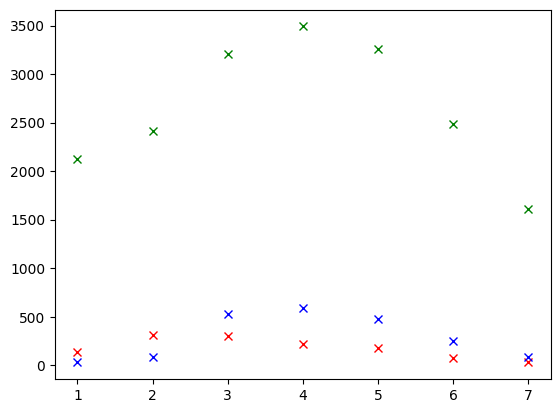

In [ ]:
depths = (1, 7)
def numUnassigned(depth: int, ontology: str, subset: SubsetGO):
    return len(subset.getRepresentatives(ontology, min_depth = depth, show=False)["unassigned"])

for i in range(1, 8):
    for o, color in zip(["CC", "BP", "MF"], ["r", "g", "b"]):
        num = numUnassigned(i, o, S)
        plt.plot(i, num, "x", color=color, label=o)